# EDA of Chicago Car Crashes

In this notebook I will perform **Exploratory Data Analysis of Chicago Car Crashes** dataset. Previously, in **"data_preparetion"** notebook, I've cleaned and manipulated two separate datasets from any unnecessary observations and features. At the end the datasets were merged and stored as **"cleaned_data.csv"** file in data folder. 

# Goal of the EDA

Since the goal of the project is to create a **model that will predict the primary contributory cause of a car accident**, I will focus on building some **graphs** and perform **additional tests** to see what features might be helpful in modeling.

## Import Packages

Import necessary packages to access dataset and manipulate it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce

# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import explore_data as ed 

Adjust settings for the notebook view and set style preferences.

In [2]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

plt.style.use('seaborn-dark')
sns.set_theme('talk')

## Upload Dataset

In [3]:
df = pd.read_csv("../data/clean_data.csv", dtype={'CRASH_RECORD_ID': str, 'RD_NO': str})

In [4]:
ed.show_info(df)

Lenght of Dataset: 99909
                               missing_values_% Data_type
CRASH_RECORD_ID                             0.0    object
RD_NO                                       0.0    object
CRASH_YEAR                                  0.0     int64
CRASH_MONTH                                 0.0     int64
CRASH_HOUR                                  0.0     int64
CRASH_DAY_OF_WEEK                           0.0     int64
POSTED_SPEED_LIMIT                          0.0     int64
TRAFFIC_CONTROL_DEVICE                      0.0    object
DEVICE_CONDITION                            0.0    object
WEATHER_CONDITION                           0.0    object
LIGHTING_CONDITION                          0.0    object
FIRST_CRASH_TYPE                            0.0    object
TRAFFICWAY_TYPE                             0.0    object
STRAIGHT_ALIGNMENT                          0.0     int64
GOOD_ROADWAY_SUFACE                         0.0     int64
ROAD_DEFECT                                 0.0

In [5]:
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_YEAR,CRASH_MONTH,CRASH_HOUR,CRASH_DAY_OF_WEEK,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,STRAIGHT_ALIGNMENT,GOOD_ROADWAY_SUFACE,ROAD_DEFECT,DESK_REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,LATITUDE,LONGITUDE,LOCATION,PERSON_TYPE,VEHICLE_ID,MALE_PERSON,AGE,DRIVERS_LICENSE_STATE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,2019,7,17,4,35,NO CONTROLS,NO CONTROLS,CLEAR,LIGHT,TURNING,ONE-WAY,1,1,0,0,NO INJURY / DRIVE AWAY,"OVER $1,500",07/10/2019 06:16:00 PM,IMPROPER BACKING,2158,N,MARMORA AVE,2515,2,NO INDICATION OF INJURY,0,0,0,0,0,3,0,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),DRIVER,656940,1,31,IL,USAGE UNKNOWN,0,0,IMPROPER BACKING,UNKNOWN,NORMAL,TEST NOT OFFERED
1,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,2020,7,10,6,30,SIGNAL,FUNCTIONING PROPERLY,CLEAR,LIGHT,REAR END,FOUR WAY,1,1,0,0,NO INJURY / DRIVE AWAY,"OVER $1,500",07/10/2020 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,1632,E,67TH ST,331,3,NO INDICATION OF INJURY,0,0,0,0,0,3,0,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),DRIVER,867994,1,50,IL,USAGE UNKNOWN,0,0,FAILED TO YIELD,UNKNOWN,NORMAL,TEST NOT OFFERED
2,f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,JD293237,2020,7,22,6,30,NO CONTROLS,NO CONTROLS,CLEAR,SOME_LIGHT,SIDESWIPE,NOT DIVIDED,1,1,0,0,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,07/10/2020 10:20:00 PM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",10,S,PULASKI RD,1115,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,41.880386,-87.725807,POINT (-87.725807044026 41.880385884998),DRIVER,868542,1,26,IL,DOT COMPLIANT MOTORCYCLE HELMET,0,0,EVADING POLICE VEHICLE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
3,f9e9718f48b224b04a54dc1a3a2b4a27d7b2e7dcd27c60...,JD292236,2020,7,4,6,30,UNKNOWN,UNKNOWN,CLEAR,SOME_LIGHT,SIDESWIPE,DIVIDED - W/MEDIAN (NOT RAISED),1,1,0,0,NO INJURY / DRIVE AWAY,$500 OR LESS,07/10/2020 05:06:00 AM,IMPROPER OVERTAKING/PASSING,351,N,CICERO AVE,1113,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,41.886769,-87.745356,POINT (-87.745355615988 41.886769176982),DRIVER,867911,0,31,IL,USAGE UNKNOWN,0,0,NONE,UNKNOWN,NORMAL,TEST NOT OFFERED
4,e57ea88dec479643bfdd99f3f25075d9250df4cc55496d...,JD294173,2020,7,15,7,30,NO CONTROLS,NO CONTROLS,CLEAR,LIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),1,1,0,1,NO INJURY / DRIVE AWAY,"OVER $1,500",07/11/2020 06:30:00 PM,IMPROPER TURNING/NO SIGNAL,45,W,79TH ST,623,2,NO INDICATION OF INJURY,0,0,0,0,0,5,0,41.750825,-87.626475,POINT (-87.626474838014 41.75082538699),DRIVER,868972,0,29,IL,SAFETY BELT USED,1,0,NONE,UNKNOWN,NORMAL,TEST NOT OFFERED


## Descriptive Analysis

First, I will perform descriptive analysis to get the mean, standart deviation and value counts of the numeric columns.

In [6]:
df.describe()

,CRASH_YEAR,CRASH_MONTH,CRASH_HOUR,CRASH_DAY_OF_WEEK,POSTED_SPEED_LIMIT,STRAIGHT_ALIGNMENT,GOOD_ROADWAY_SUFACE,ROAD_DEFECT,DESK_REPORT_TYPE,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,LATITUDE,LONGITUDE,VEHICLE_ID,MALE_PERSON,AGE,AIRBAG_DEPLOYED,EJECTION
count,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.00000,99909.000000,99909.000000,99909.0,99909.000000,99909.000000,9.990900e+04,99909.000000,99909.000000,99909.000000,99909.000000
mean,2019.423035,6.468426,13.381397,4.157133,29.163078,0.988680,0.791981,0.020258,0.439730,3678.598535,1242.680479,2.056752,0.250168,0.000991,0.025313,0.14279,0.081074,2.215716,0.0,41.854804,-87.673600,7.421296e+05,0.609775,39.524317,0.100091,0.002112
std,0.494043,3.444740,5.430082,1.958839,5.284492,0.105793,0.405893,0.140884,0.496357,2879.421854,712.432181,0.471494,0.656208,0.033616,0.188155,0.49998,0.364768,1.197367,0.0,0.335909,0.682108,1.249825e+05,0.487803,16.265801,0.300123,0.045907
min,2019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,-87.934014,5.296840e+05,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,10.000000,2.000000,30.000000,1.000000,1.000000,0.000000,0.000000,1202.000000,634.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.0,41.779946,-87.722202,6.337280e+05,0.000000,27.000000,0.000000,0.000000
50%,2019.000000,7.000000,14.000000,4.000000,30.000000,1.000000,1.000000,0.000000,0.000000,3198.000000,1213.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.0,41.875481,-87.672206,7.404870e+05,1.000000,36.000000,0.000000,0.000000
75%,2020.000000,9.000000,17.000000,6.000000,30.000000,1.000000,1.000000,0.000000,1.000000,5600.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,0.0,41.925282,-87.632599,8.483740e+05,1.000000,51.000000,0.000000,0.000000
max,2020.000000,12.000000,23.000000,7.000000,70.000000,1.000000,1.000000,1.000000,1.000000,13799.000000,2535.000000,12.000000,21.000000,3.000000,6.000000,21.00000,15.000000,42.000000,0.0,42.022780,0.000000,1.011601e+06,1.000000,100.000000,1.000000,1.000000


* The describe function does not give a lot of useful information, since the most of the numeric columns represent binary categorical data.

## Plot Histogram for Numeric Features

I will plot a histograms for features like **CRASH_MONTH, CRASH_HOUR, CRASH_DAY_OF_WEEK** to see what is the most common value for those features.

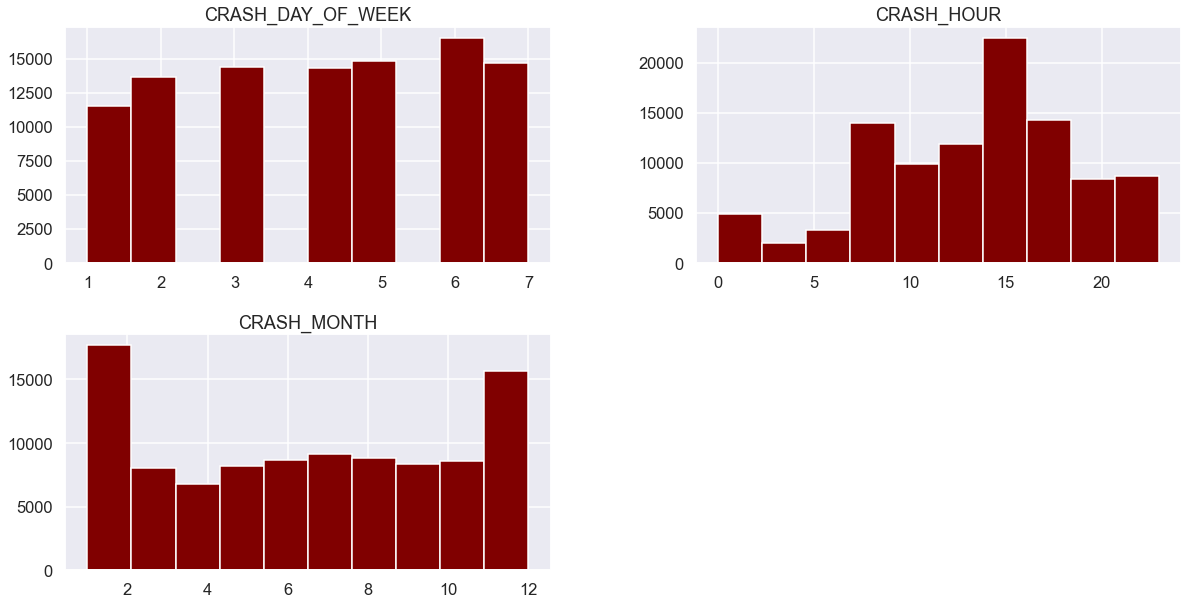

In [7]:
cols_cont =['CRASH_MONTH', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK']

df[cols_cont].hist(figsize = (20,10), edgecolor="w", facecolor='maroon');

* The highest amount of crashes happened on **Saturday**
* Large amount of crashes happened during afternoon **(around 3 PM)**. My guess would be the reason is traffic.
* And majority of crashes are during **January and December**, probably due to the weather condition.

## Primary Cause of Crash vs. Number of Crashes

Now I will investigate what causes of crash have the highest amount....

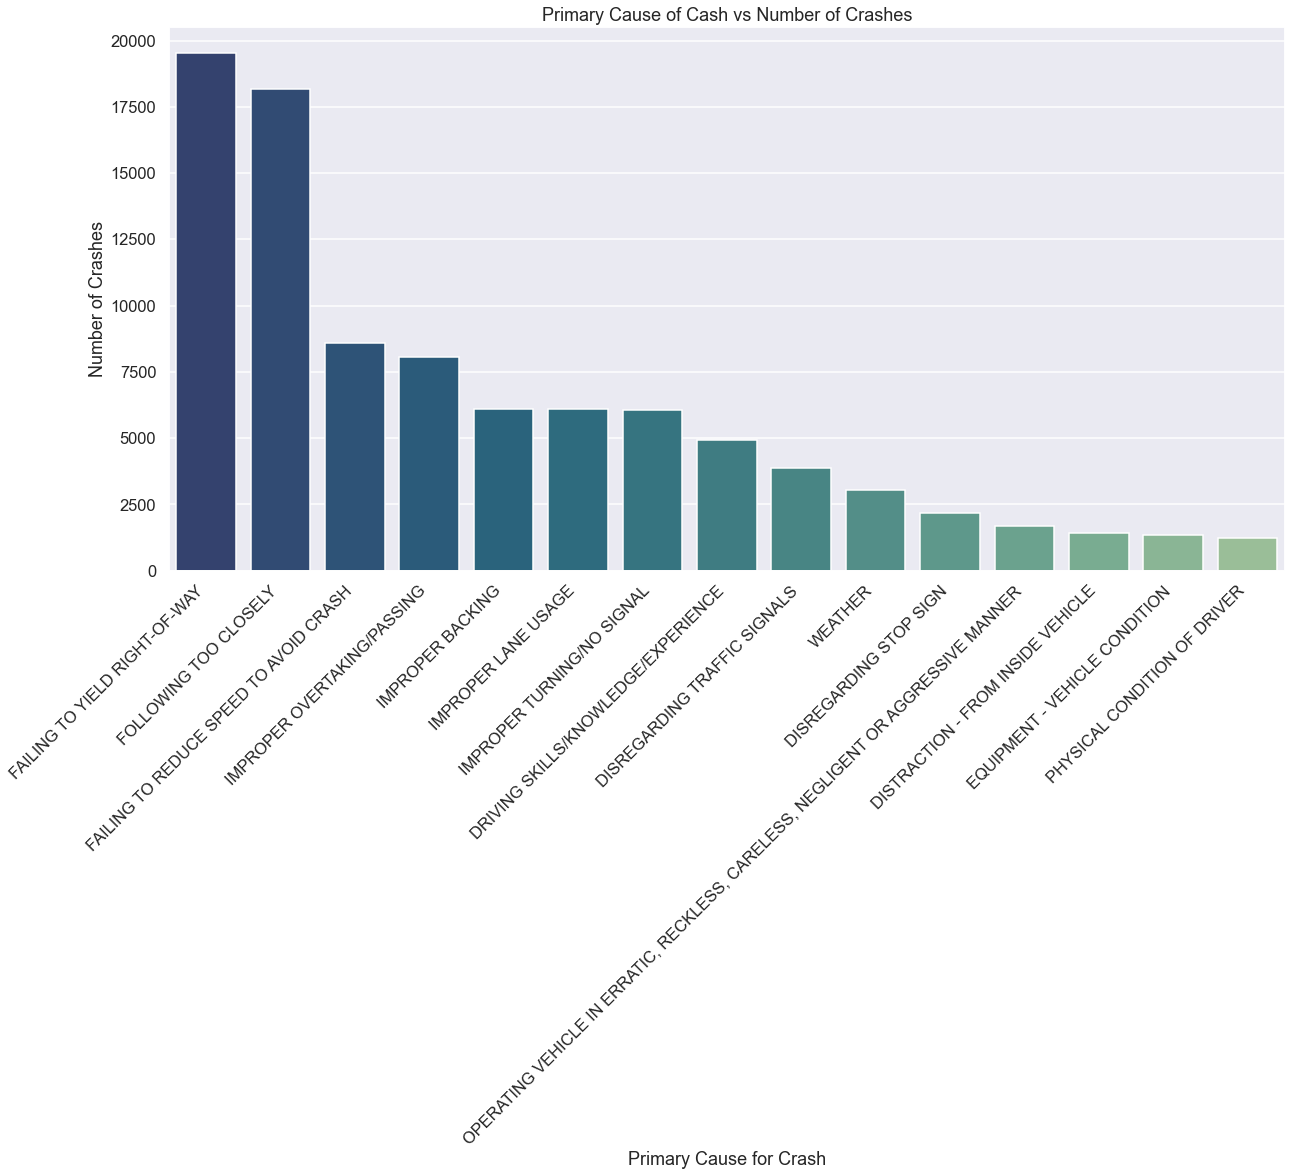

In [8]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="PRIM_CONTRIBUTORY_CAUSE", data=df,
                   order = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(15).index, 
                   palette = 'crest_r')

plt.xlabel('Primary Cause for Crash')
plt.ylabel('Number of Crashes')
plt.title('Primary Cause of Cash vs Number of Crashes')
plt.show()

As the graph shows, most of the crashes happened because of following causes: **failing to yield, following too closely.**

## Driver's Age vs. Number of Crashes

Let's see at what age drivers were at thye moment of the crashes.

Text(0, 0.5, 'Number of Crashes')

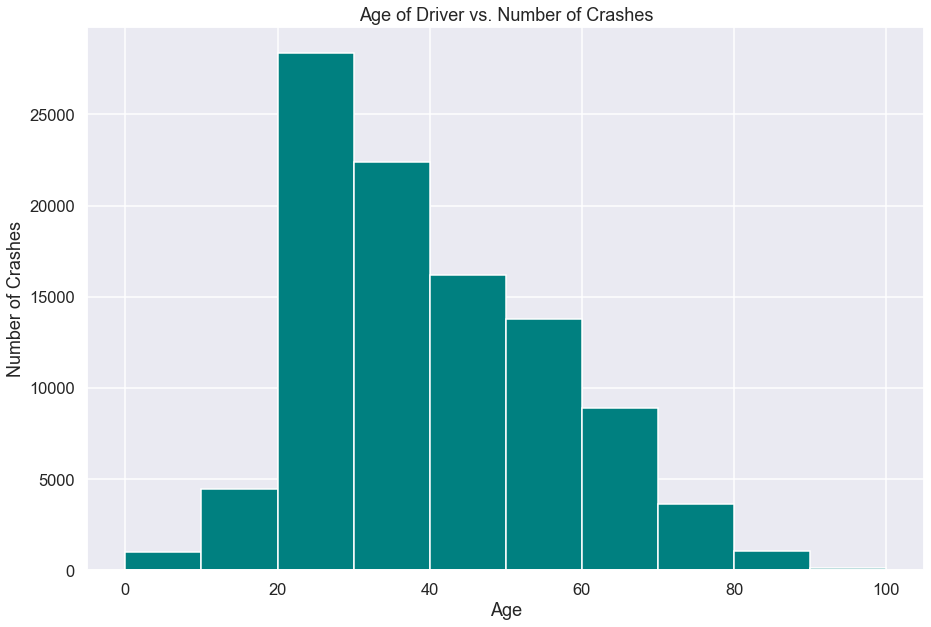

In [10]:
fig, ax = plt.subplots(figsize =(15,10))

ax.hist(df['AGE'], edgecolor="w", facecolor='teal')
  
# Set title
ax.set_title("Age of Driver vs. Number of Crashes")
  
# adding labels
ax.set_xlabel('Age')
ax.set_ylabel('Number of Crashes')

## Crash Types Frequency

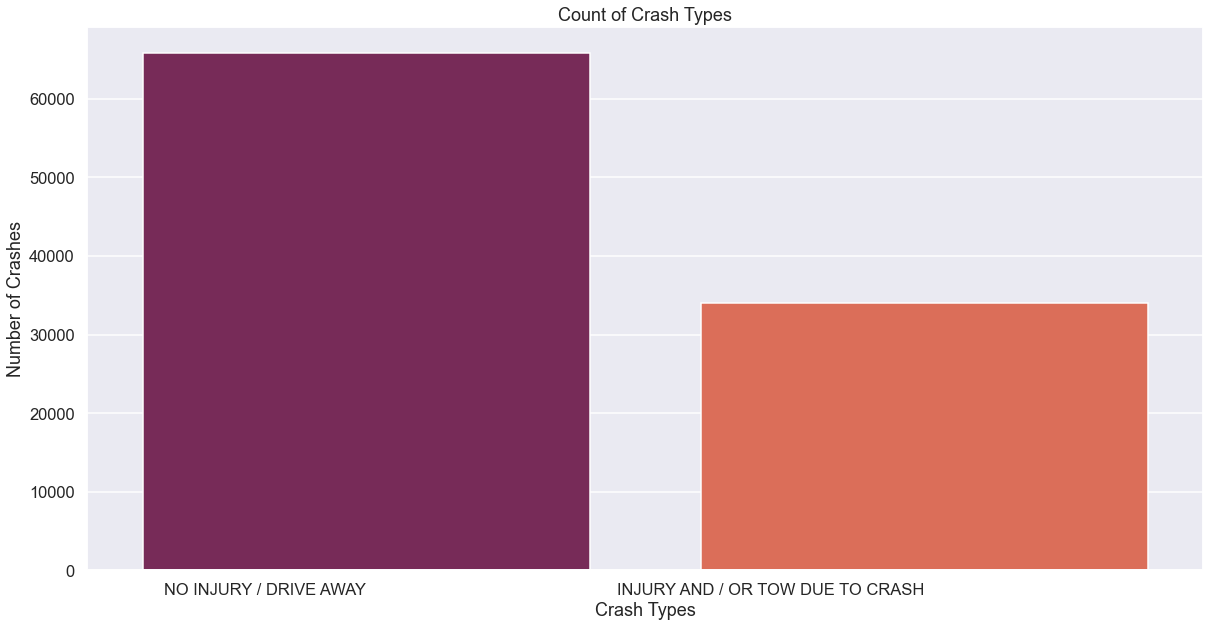

In [11]:
plt.figure(figsize =(20,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(x="CRASH_TYPE", data=df,
                   order = df['CRASH_TYPE'].value_counts().index, 
                   palette = 'rocket')


plt.xlabel('Crash Types')
plt.ylabel('Number of Crashes')
plt.title('Count of Crash Types')
plt.show()

## Exploration of Crashes with No Injury

Now, I will look into the observations where the **crash resulted in no injury** and see what were the **main causes and reasons** for those crashes.

In [12]:
df_no_injury = df[df['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY']

### Primary Cause of the Crashes

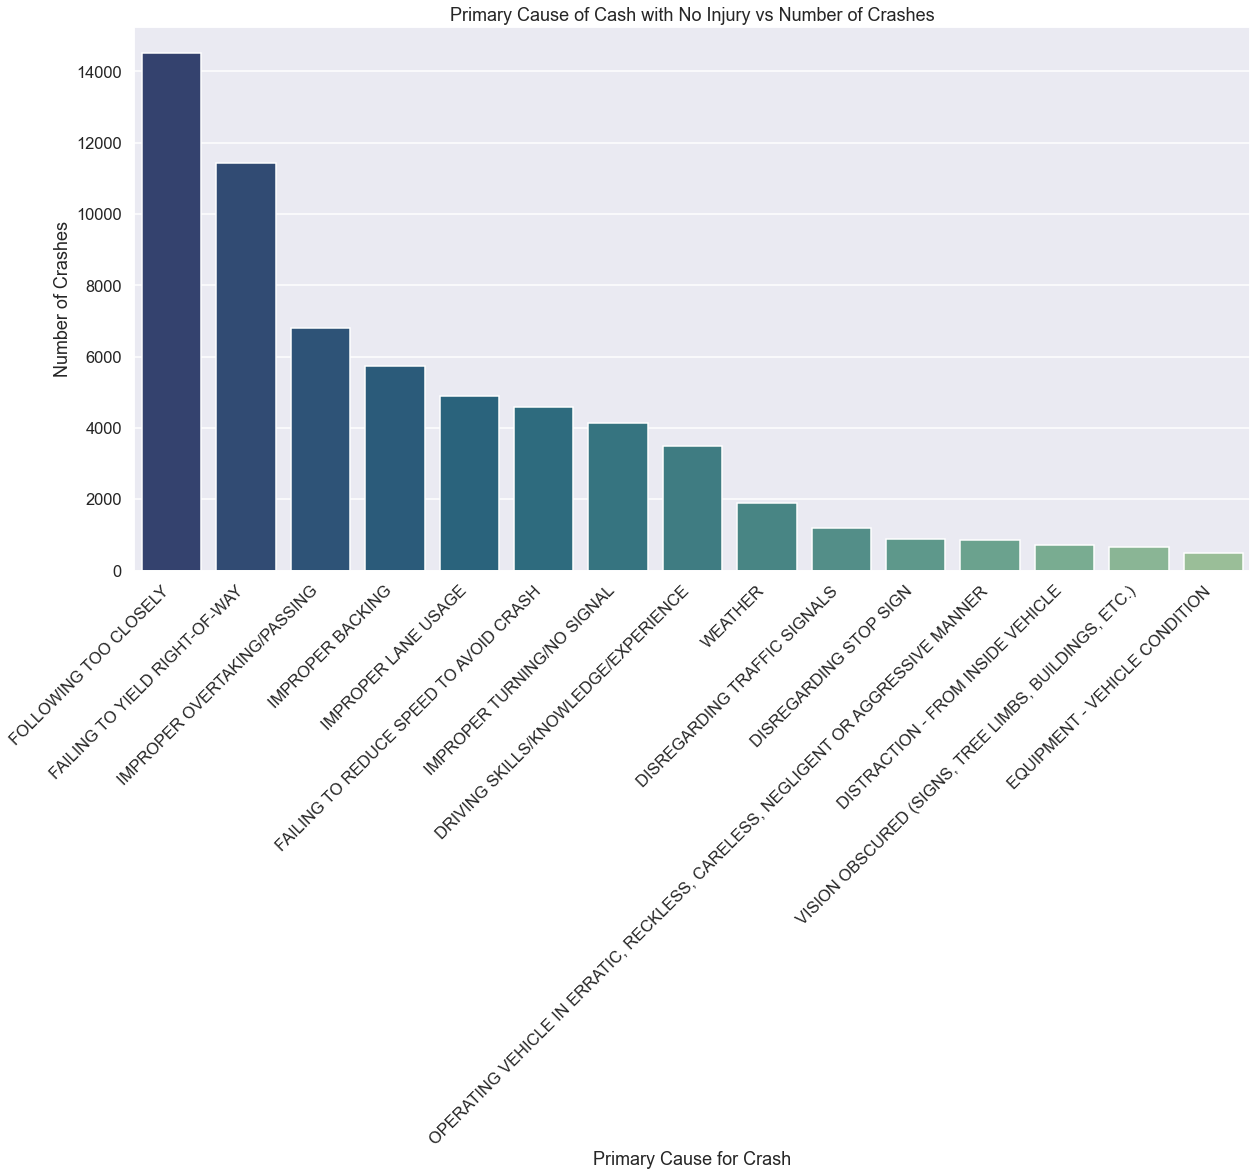

In [13]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="PRIM_CONTRIBUTORY_CAUSE", data=df_no_injury,
                   order = df_no_injury['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(15).index, 
                   palette = 'crest_r')

plt.xlabel('Primary Cause for Crash')
plt.ylabel('Number of Crashes')
plt.title('Primary Cause of Cash with No Injury vs Number of Crashes')
plt.show()

As it is shown on graph, the majority of **no-injury crashes** were because of **following too closely or failing to yield.**

### Weather and Road Conditions for Crashes

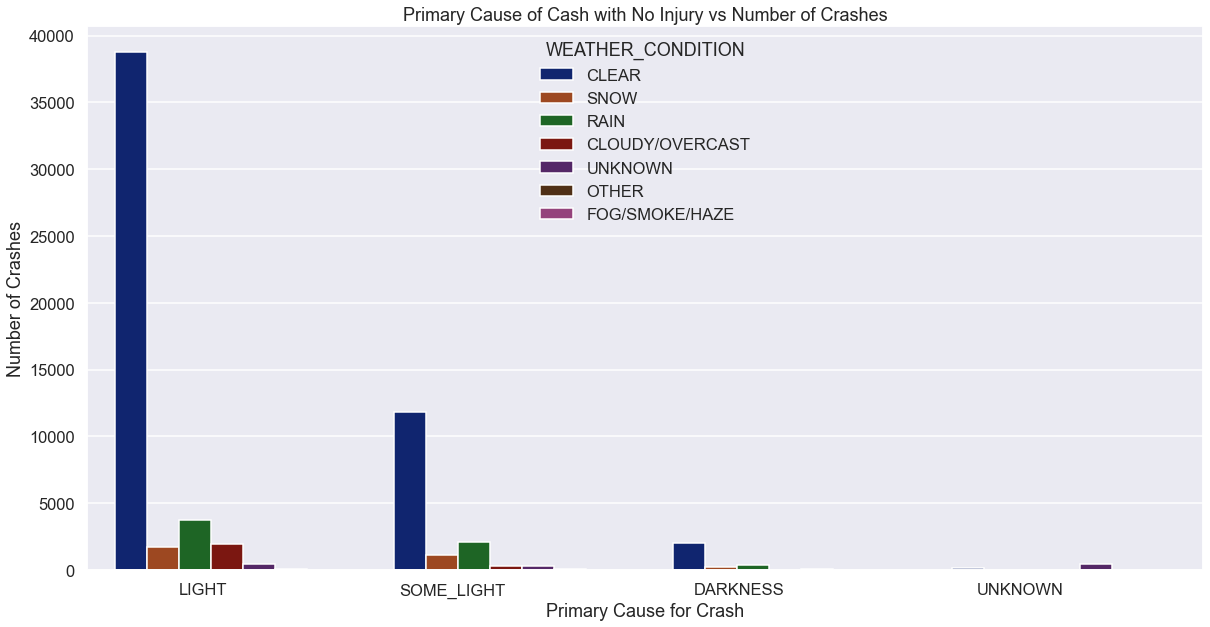

In [14]:
fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="LIGHTING_CONDITION", hue="WEATHER_CONDITION", palette="dark", data=df_no_injury)

plt.xlabel('Primary Cause for Crash')
plt.ylabel('Number of Crashes')
plt.title('Primary Cause of Cash with No Injury vs Number of Crashes')
plt.show()




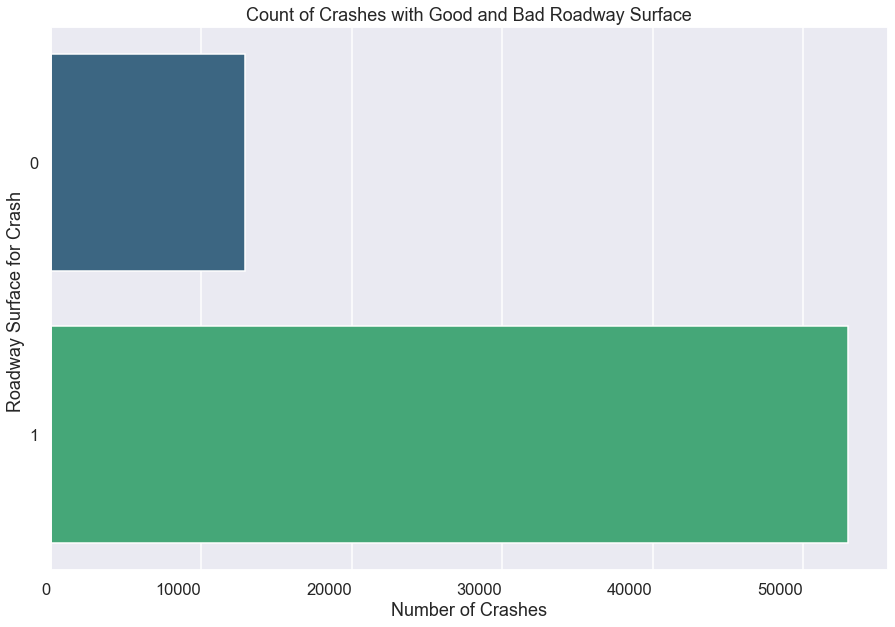

In [15]:
plt.figure(figsize =(15,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(y="GOOD_ROADWAY_SUFACE", data=df_no_injury, palette = 'viridis')

plt.xlabel('Number of Crashes')
plt.ylabel('Roadway Surface for Crash ')
plt.title('Count of Crashes with Good and Bad Roadway Surface')
plt.show()

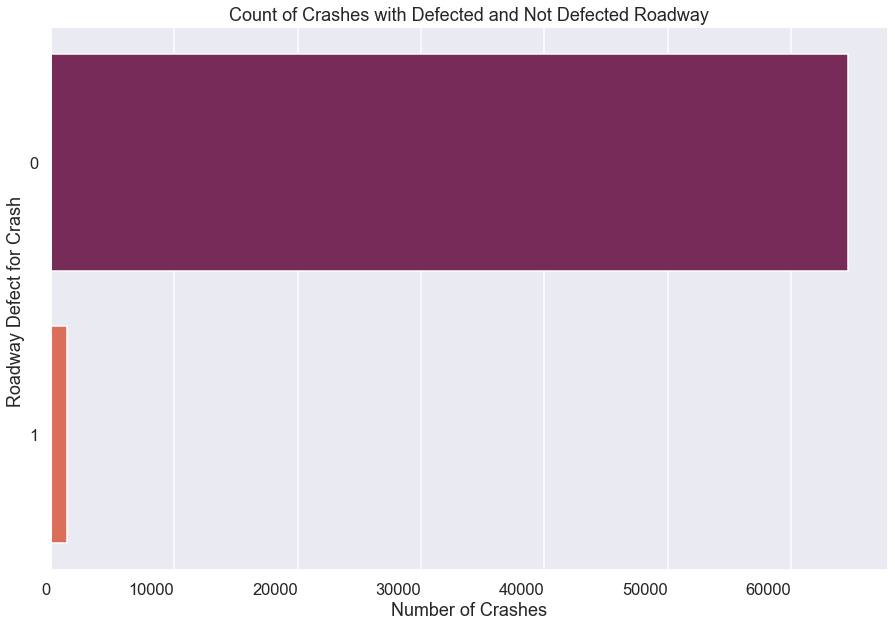

In [16]:
plt.figure(figsize =(15,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(y="ROAD_DEFECT", data=df_no_injury, palette = 'rocket')

plt.xlabel('Number of Crashes')
plt.ylabel('Roadway Defect for Crash ')
plt.title('Count of Crashes with Defected and Not Defected Roadway')
plt.show()

**EDA Result:**
* Most of the Crashes happened during **light time and clear weather.** 
* The **roadway surface** for most of the cases was **good**.
* Vast majority of the crashes happened on **roads with no defect.**

### Inital State of the Crashes

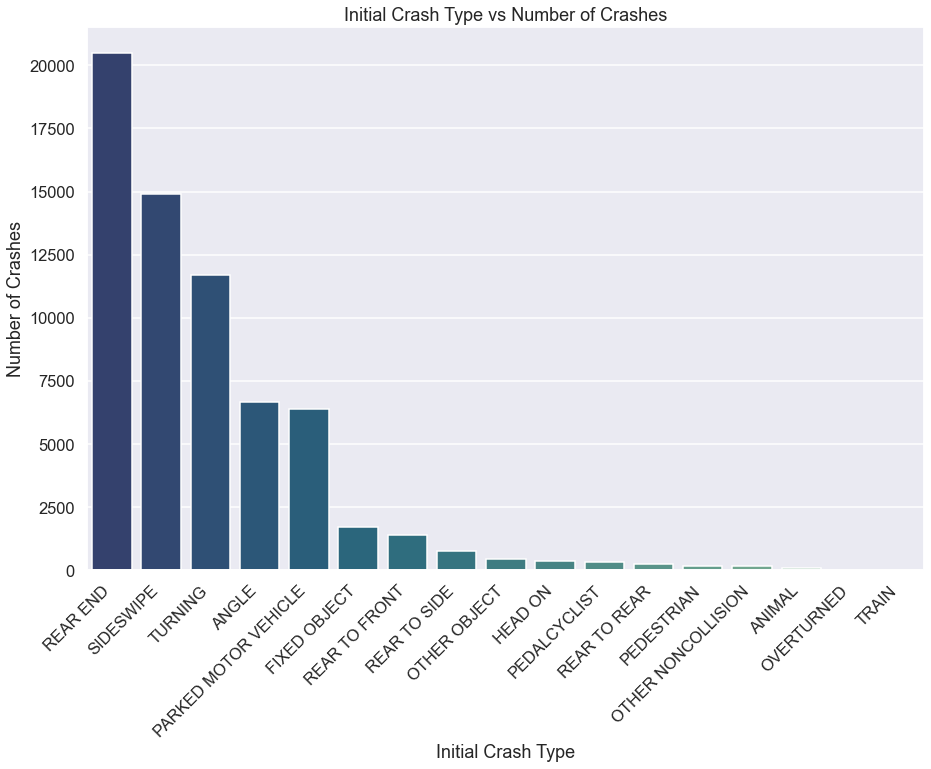

In [17]:
plt.figure(figsize =(15,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="FIRST_CRASH_TYPE", data=df_no_injury, 
                   order = df_no_injury['FIRST_CRASH_TYPE'].value_counts().index, palette = 'crest_r')
plt.xlabel('Initial Crash Type')
plt.ylabel('Number of Crashes')
plt.title('Initial Crash Type vs Number of Crashes')
plt.show()

Majority of crashes happened on the **rear end, sideswipe or while turning.**

### Driver's Gender

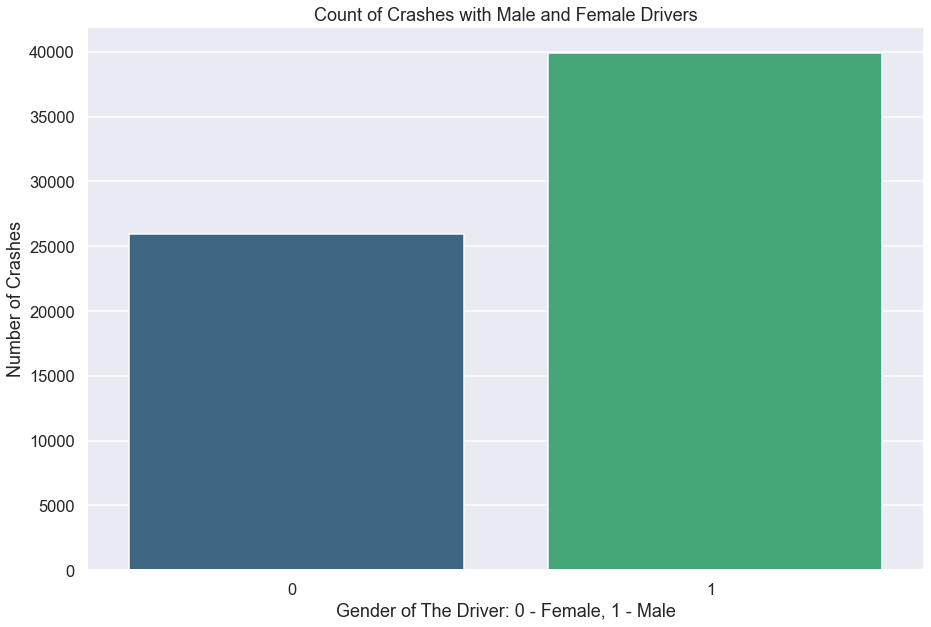

In [18]:
plt.figure(figsize =(15,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(x="MALE_PERSON", data=df_no_injury, palette = 'viridis')

plt.ylabel('Number of Crashes')
plt.xlabel('Gender of The Driver: 0 - Female, 1 - Male')
plt.title('Count of Crashes with Male and Female Drivers')
plt.show()

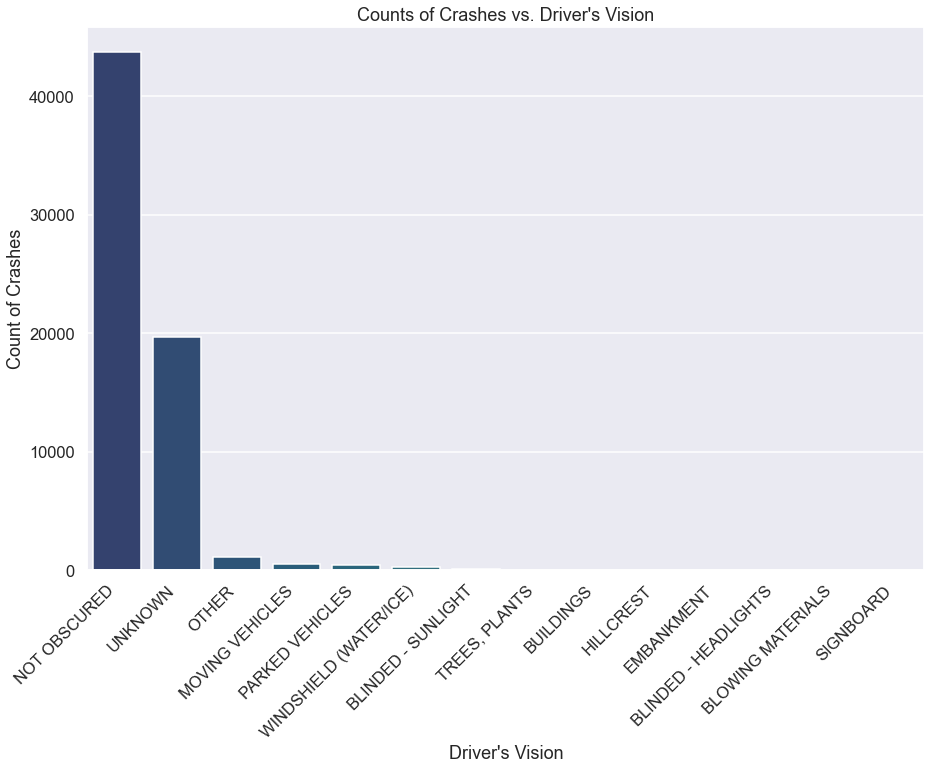

In [19]:
plt.figure(figsize =(15,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="DRIVER_VISION", data=df_no_injury, 
                   order = df_no_injury['DRIVER_VISION'].value_counts().index, palette = 'crest_r')
plt.xlabel('Driver\'s Vision')
plt.ylabel('Count of Crashes')
plt.title('Counts of Crashes vs. Driver\'s Vision')
plt.show()

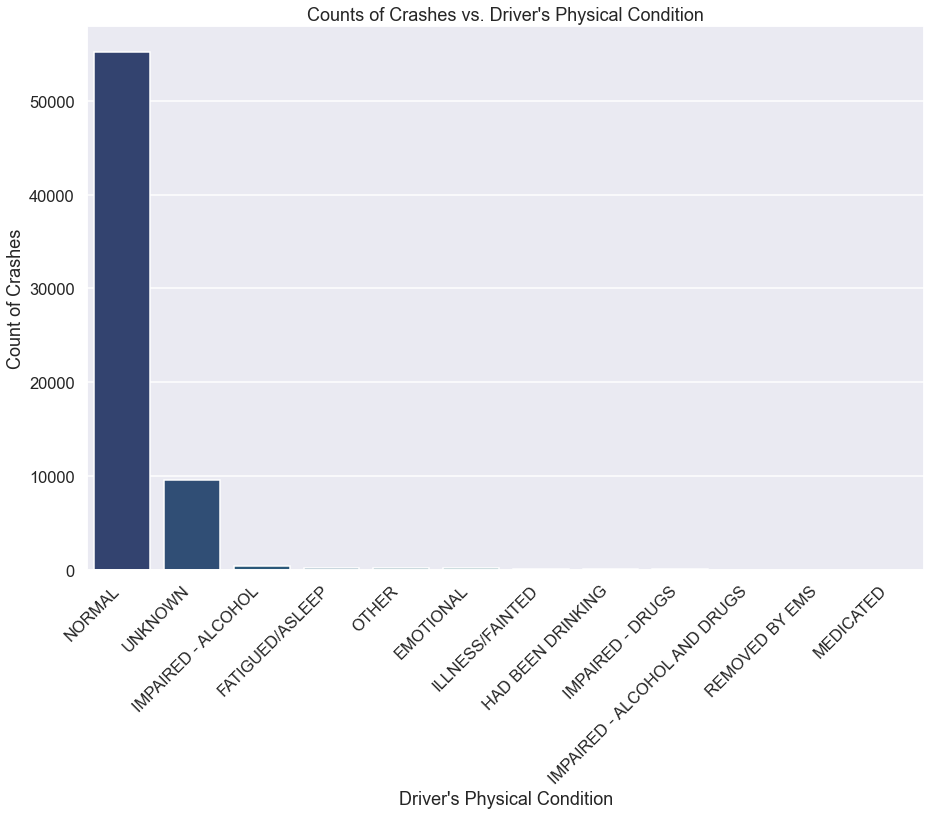

In [20]:
plt.figure(figsize =(15,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="PHYSICAL_CONDITION", data=df_no_injury, 
                   order = df_no_injury['PHYSICAL_CONDITION'].value_counts().index, palette = 'crest_r')
plt.xlabel('Driver\'s Physical Condition')
plt.ylabel('Count of Crashes')
plt.title('Counts of Crashes vs. Driver\'s Physical Condition')
plt.show()

## Crashes Resulted in Fatal Injury

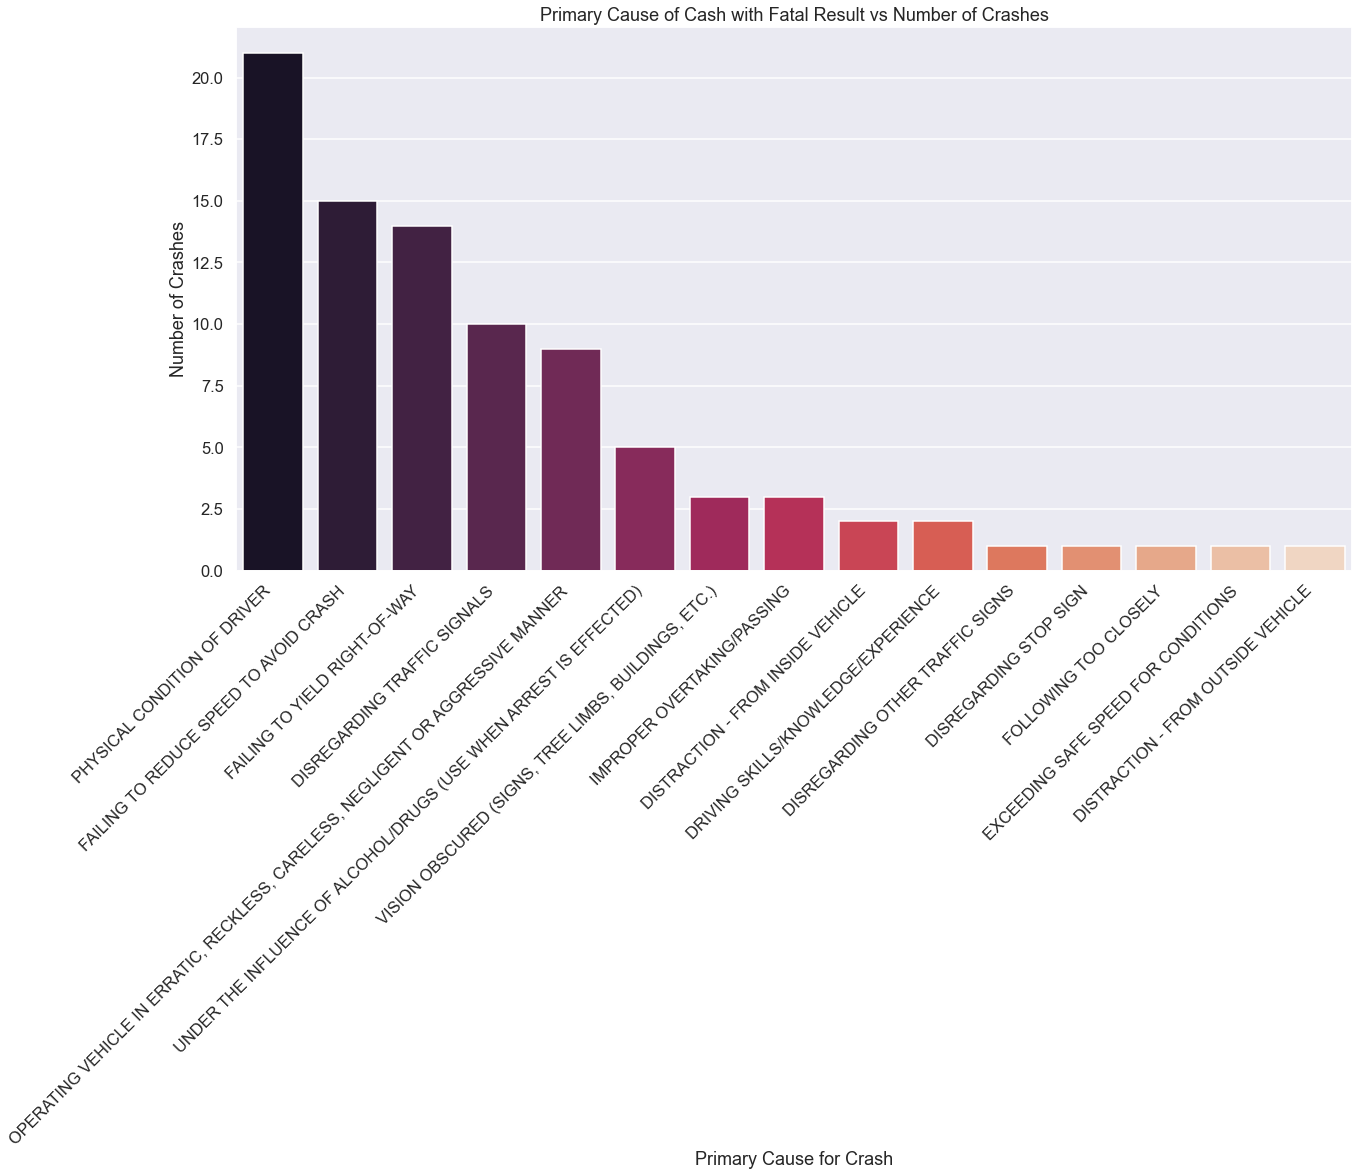

In [21]:
df_fatal = df[df['MOST_SEVERE_INJURY'] == 'FATAL']

plt.figure(figsize =(20,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="PRIM_CONTRIBUTORY_CAUSE", data=df_fatal,
                   order = df_fatal['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(15).index, 
                   palette = 'rocket')

plt.xlabel('Primary Cause for Crash')
plt.ylabel('Number of Crashes')
plt.title('Primary Cause of Cash with Fatal Result vs Number of Crashes')
plt.show()

Since majority of crashes were caused by **Physical Condition of the driver**, let's see into that column.

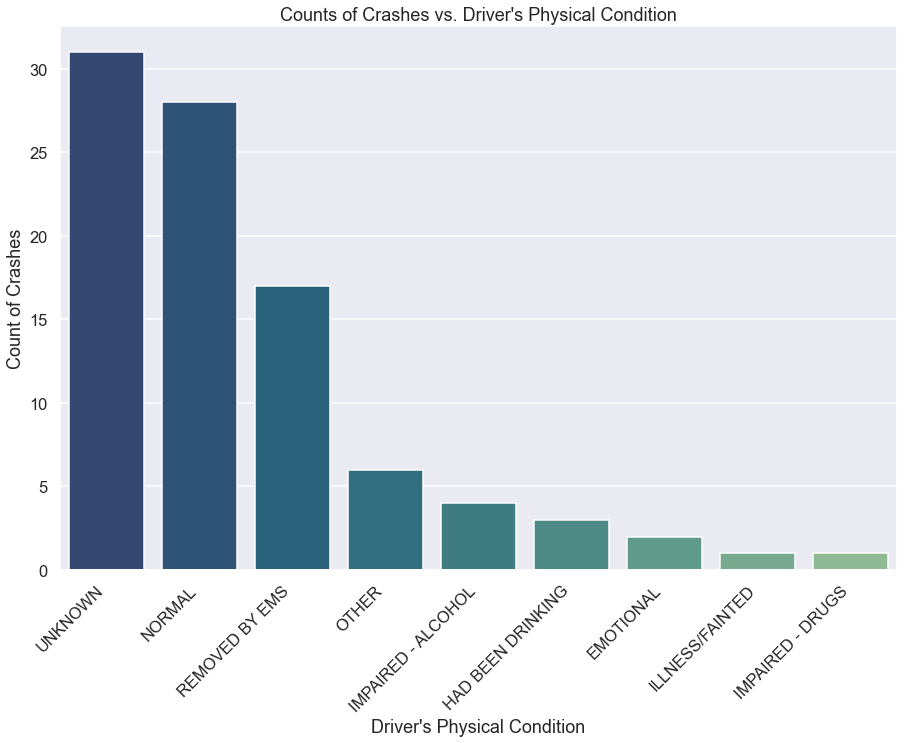

In [22]:
plt.figure(figsize =(15,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="PHYSICAL_CONDITION", data=df_fatal, 
                   order = df_fatal['PHYSICAL_CONDITION'].value_counts().index, palette = 'crest_r')
plt.xlabel('Driver\'s Physical Condition')
plt.ylabel('Count of Crashes')
plt.title('Counts of Crashes vs. Driver\'s Physical Condition')
plt.show()

## Driver's Gender of Crash with Fatal Injury

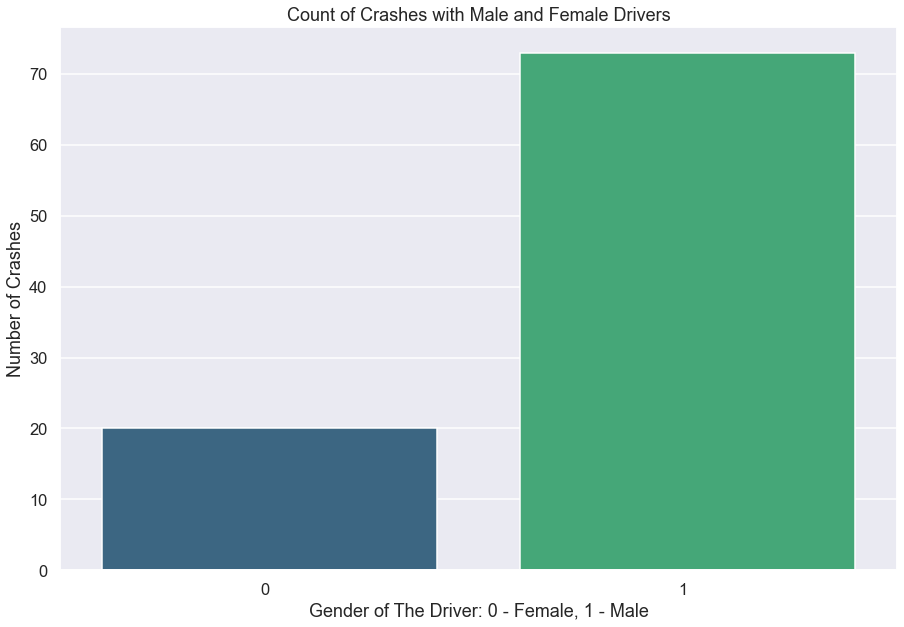

In [23]:
plt.figure(figsize =(15,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(x="MALE_PERSON", data=df_fatal, palette = 'viridis')

plt.ylabel('Number of Crashes')
plt.xlabel('Gender of The Driver: 0 - Female, 1 - Male')
plt.title('Count of Crashes with Male and Female Drivers')
plt.show()

### Weather and Road Conditions for Crashes

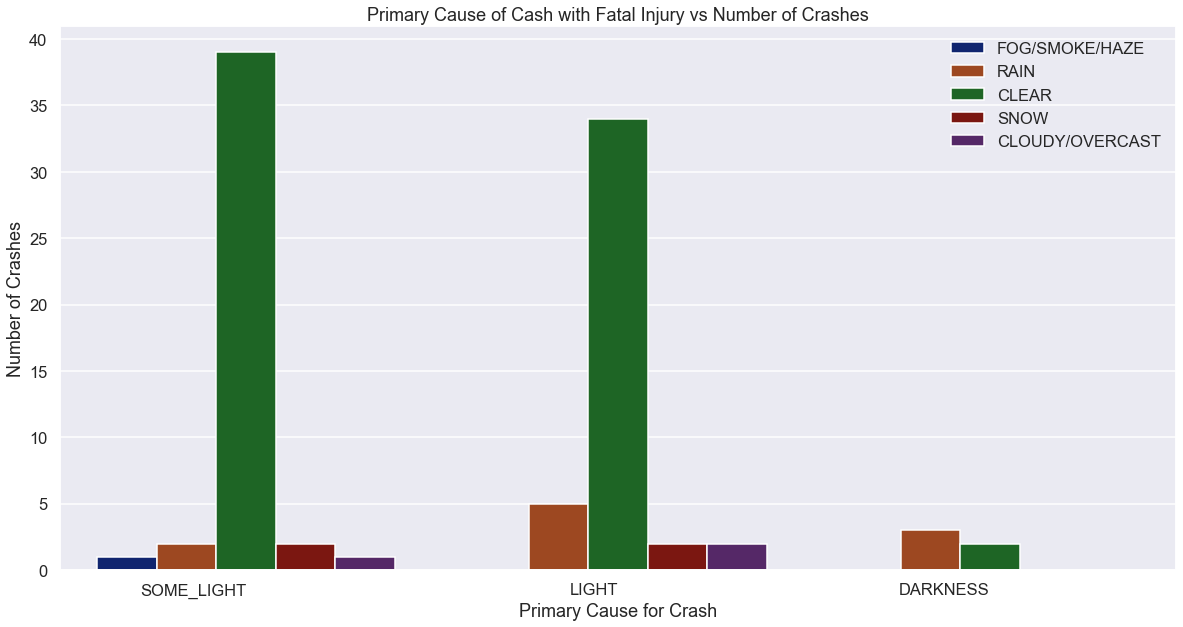

In [24]:
fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="LIGHTING_CONDITION", hue="WEATHER_CONDITION", palette="dark", data=df_fatal)

plt.xlabel('Primary Cause for Crash')
plt.ylabel('Number of Crashes')
plt.title('Primary Cause of Cash with Fatal Injury vs Number of Crashes')
plt.legend(loc = 'upper right')
plt.show()




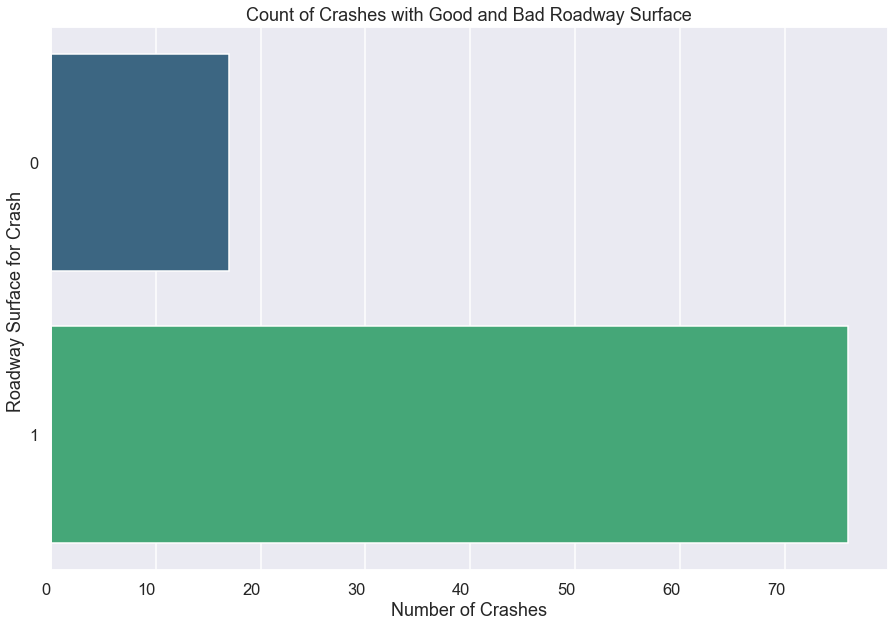

In [25]:
plt.figure(figsize =(15,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(y="GOOD_ROADWAY_SUFACE", data=df_fatal, palette = 'viridis')

plt.xlabel('Number of Crashes')
plt.ylabel('Roadway Surface for Crash ')
plt.title('Count of Crashes with Good and Bad Roadway Surface')
plt.show()

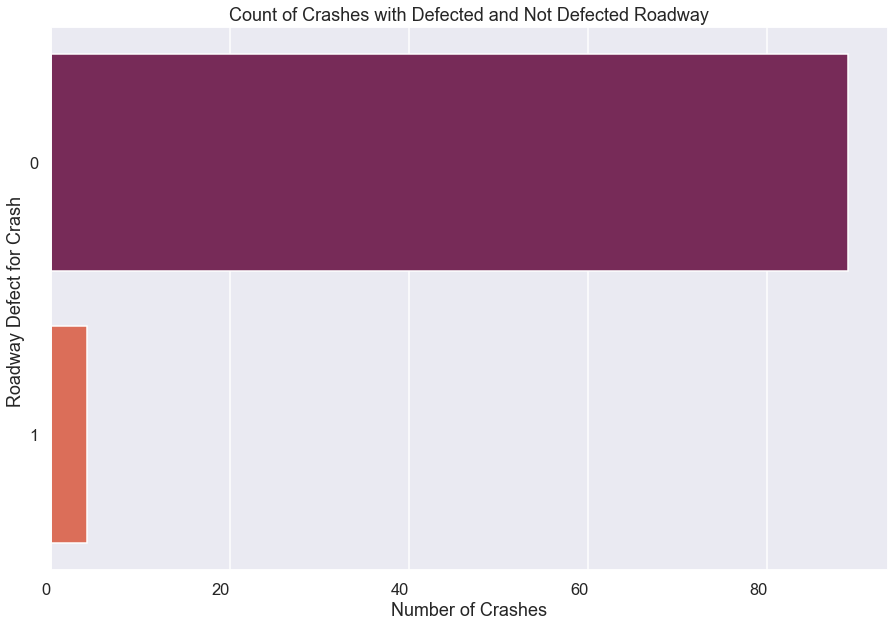

In [26]:
plt.figure(figsize =(15,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(y="ROAD_DEFECT", data=df_fatal, palette = 'rocket')

plt.xlabel('Number of Crashes')
plt.ylabel('Roadway Defect for Crash ')
plt.title('Count of Crashes with Defected and Not Defected Roadway')
plt.show()

**EDA Result:**
* Most of the Crashes with Fatal Injury happened during **light time or with some light, and weather was clear.** 
* The **roadway surface** for most of the cases was **good**.
* Vast majority of the crashes happened on **roads with no defect.**

## Severity of Injury and Hour of Crash

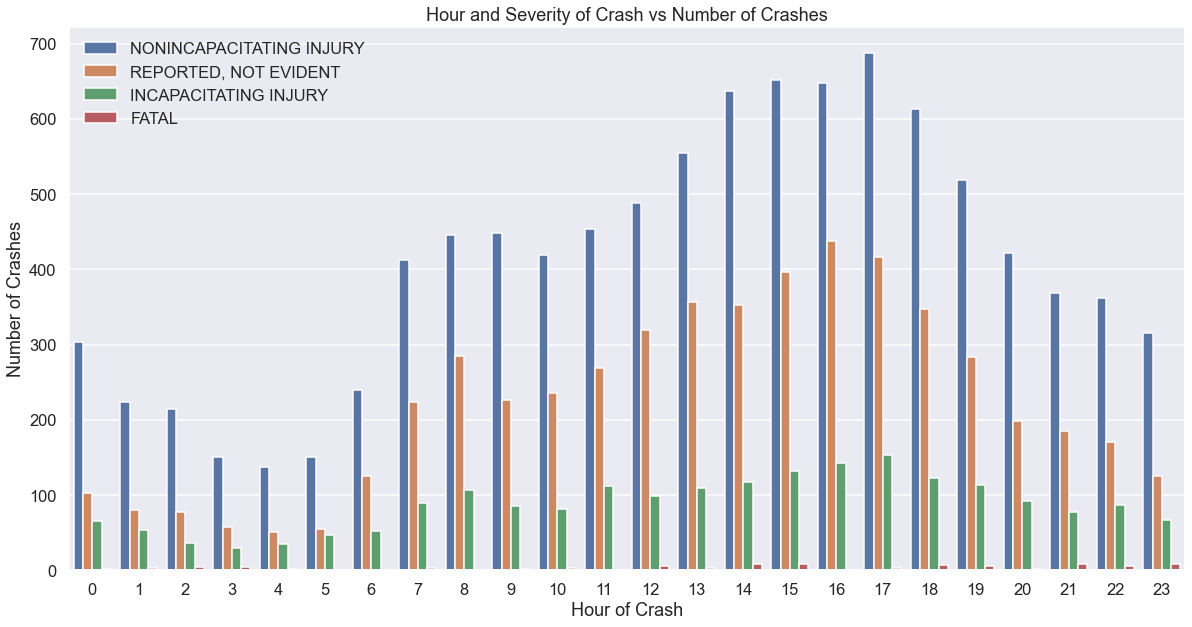

In [27]:
df_injury = df[df['MOST_SEVERE_INJURY'] != 'NO INDICATION OF INJURY']


plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_HOUR", hue = 'MOST_SEVERE_INJURY',data=df_injury)
plt.xlabel('Hour of Crash')
plt.ylabel('Number of Crashes')
plt.title('Hour and Severity of Crash vs Number of Crashes')
plt.legend(loc = 'upper left')
plt.show()

As the graph shows, the **peak hours** for the crashes with injury are from **1 PM to 5 PM.**

## Trafficway Type and Number of Crashes

Lastly, I will look into the Trafficway type of the place where crash happened.

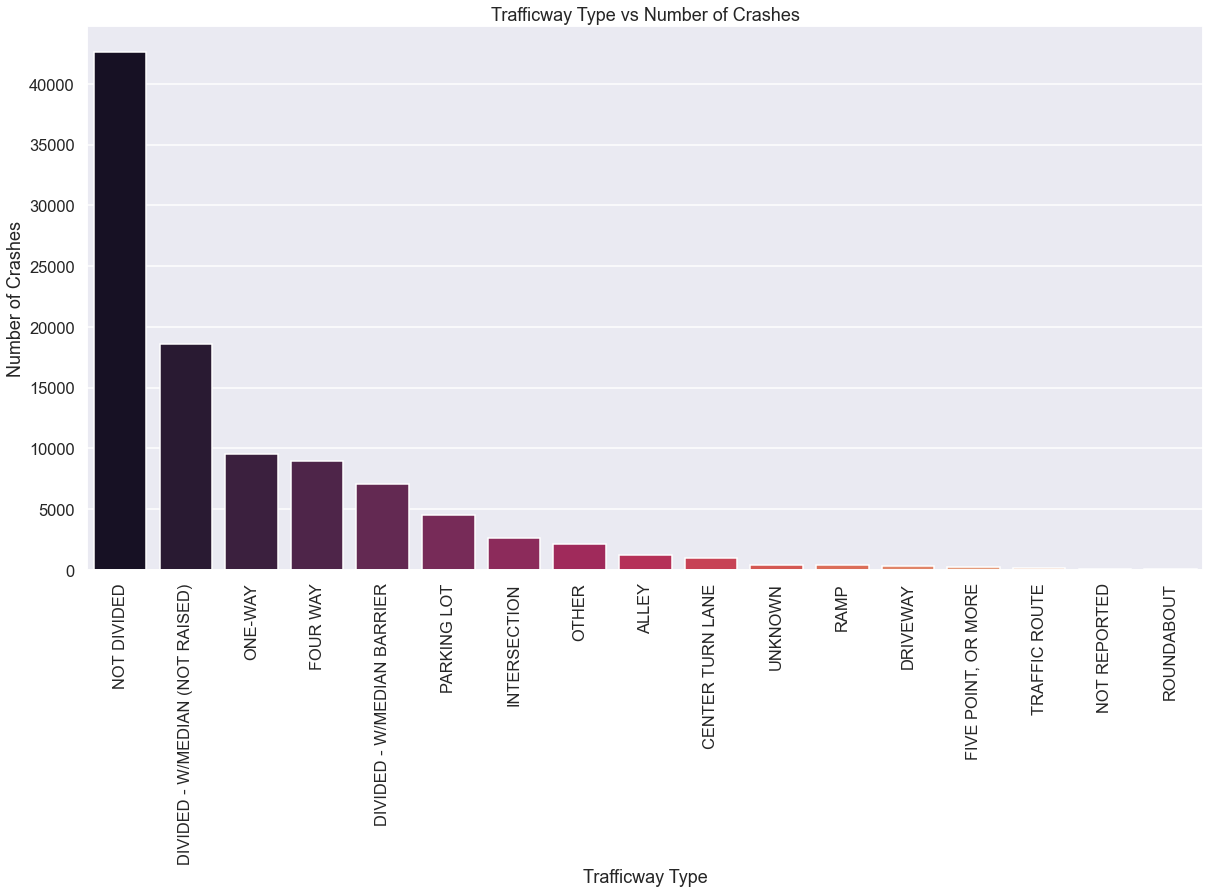

In [28]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=90)

ax = sns.countplot(x="TRAFFICWAY_TYPE", data=df,
                   order = df['TRAFFICWAY_TYPE'].value_counts().index, 
                   palette = 'rocket')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Crashes')
plt.title('Trafficway Type vs Number of Crashes')
plt.show()

For most of the crashes, the **trafficway was not divided.**

## Sort out Primary Contributory Cause for the Crash

The ease the work of the models, I will **regroup the types of causes** and create less categorized column with following categories: **Improper/Agressive Driving, Irresponsible Behavior and External/Other Causes.**

In [29]:
df.PRIM_CONTRIBUTORY_CAUSE.value_counts().to_dict()

{'FAILING TO YIELD RIGHT-OF-WAY': 19532,
 'FOLLOWING TOO CLOSELY': 18186,
 'FAILING TO REDUCE SPEED TO AVOID CRASH': 8589,
 'IMPROPER OVERTAKING/PASSING': 8074,
 'IMPROPER BACKING': 6115,
 'IMPROPER LANE USAGE': 6104,
 'IMPROPER TURNING/NO SIGNAL': 6065,
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 4915,
 'DISREGARDING TRAFFIC SIGNALS': 3858,
 'WEATHER': 3030,
 'DISREGARDING STOP SIGN': 2185,
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 1669,
 'DISTRACTION - FROM INSIDE VEHICLE': 1413,
 'EQUIPMENT - VEHICLE CONDITION': 1335,
 'PHYSICAL CONDITION OF DRIVER': 1219,
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 1189,
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 1181,
 'DISTRACTION - FROM OUTSIDE VEHICLE': 853,
 'DRIVING ON WRONG SIDE/WRONG WAY': 824,
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 573,
 'DISREGARDING OTHER TRAFFIC SIGNS': 422,
 'ROAD CONSTRUCTION/MAINTENANCE': 413,
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT,

In [30]:
agress_dict = {'FAILING TO YIELD RIGHT-OF-WAY': 'AGRESSIVE/IMPROPER DRIVING',  
               'FAILING TO REDUCE SPEED TO AVOID CRASH': 'AGRESSIVE/IMPROPER DRIVING', 
               'IMPROPER OVERTAKING/PASSING': 'AGRESSIVE/IMPROPER DRIVING', 
               'IMPROPER TURNING/NO SIGNAL': 'AGRESSIVE/IMPROPER DRIVING', 
               'IMPROPER LANE USAGE': 'AGRESSIVE/IMPROPER DRIVING', 
               'IMPROPER BACKING': 'AGRESSIVE/IMPROPER DRIVING',
               'TURNING RIGHT ON RED':'AGRESSIVE/IMPROPER DRIVING', 
               'RELATED TO BUS STOP': 'AGRESSIVE/IMPROPER DRIVING', 
               'EXCEEDING AUTHORIZED SPEED LIMIT': 'AGRESSIVE/IMPROPER DRIVING'}

df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].map(agress_dict).fillna(df['PRIM_CONTRIBUTORY_CAUSE'])
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

AGRESSIVE/IMPROPER DRIVING                                                          54895
FOLLOWING TOO CLOSELY                                                               18186
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  4915
DISREGARDING TRAFFIC SIGNALS                                                         3858
WEATHER                                                                              3030
DISREGARDING STOP SIGN                                                               2185
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1669
DISTRACTION - FROM INSIDE VEHICLE                                                    1413
EQUIPMENT - VEHICLE CONDITION                                                        1335
PHYSICAL CONDITION OF DRIVER                                                         1219
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                                 1189
UNDER THE 

In [31]:
irresp_dict = {'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'IRRESPONSIBLE BEHAVIOR', 
               'EQUIPMENT - VEHICLE CONDITION': 'IRRESPONSIBLE BEHAVIOR', 
               'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'IRRESPONSIBLE BEHAVIOR', 
               'PHYSICAL CONDITION OF DRIVER':'IRRESPONSIBLE BEHAVIOR', 
               'CELL PHONE USE OTHER THAN TEXTING': 'IRRESPONSIBLE BEHAVIOR', 
               'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':'IRRESPONSIBLE BEHAVIOR', 
               'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'IRRESPONSIBLE BEHAVIOR', 
               'TEXTING': 'IRRESPONSIBLE BEHAVIOR', 'PASSING STOPPED SCHOOL BUS': 'IRRESPONSIBLE BEHAVIOR', 
               'DISTRACTION - FROM INSIDE VEHICLE': 'IRRESPONSIBLE BEHAVIOR', 
               'DISREGARDING TRAFFIC SIGNALS': 'IRRESPONSIBLE BEHAVIOR', 
               'DISREGARDING STOP SIGN': 'IRRESPONSIBLE BEHAVIOR', 
               'DISREGARDING OTHER TRAFFIC SIGNS': 'IRRESPONSIBLE BEHAVIOR', 
               'DISREGARDING YIELD SIGN': 'IRRESPONSIBLE BEHAVIOR', 
               'DISREGARDING ROAD MARKINGS': 'IRRESPONSIBLE BEHAVIOR', 
               'FOLLOWING TOO CLOSELY': 'IRRESPONSIBLE BEHAVIOR', 
               'DRIVING ON WRONG SIDE/WRONG WAY': 'IRRESPONSIBLE BEHAVIOR', 
               'TURNING RIGHT ON RED':'IRRESPONSIBLE BEHAVIOR'}

df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].map(irresp_dict).fillna(df['PRIM_CONTRIBUTORY_CAUSE'])
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

AGRESSIVE/IMPROPER DRIVING                              54895
IRRESPONSIBLE BEHAVIOR                                  33241
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                      4915
WEATHER                                                  3030
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)     1189
DISTRACTION - FROM OUTSIDE VEHICLE                        853
ROAD ENGINEERING/SURFACE/MARKING DEFECTS                  573
ROAD CONSTRUCTION/MAINTENANCE                             413
EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST         354
EXCEEDING SAFE SPEED FOR CONDITIONS                       222
ANIMAL                                                    173
OBSTRUCTED CROSSWALKS                                      32
BICYCLE ADVANCING LEGALLY ON RED LIGHT                     11
MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT                   8
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [32]:
external_dict = {'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'EXTERNAL/OTHER FACTORS', 
                 'WEATHER': 'EXTERNAL/OTHER FACTORS', 
                 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'EXTERNAL/OTHER FACTORS', 
                 'DISTRACTION - FROM OUTSIDE VEHICLE': 'EXTERNAL/OTHER FACTORS', 
                 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'EXTERNAL/OTHER FACTORS', 
                 'ROAD CONSTRUCTION/MAINTENANCE': 'EXTERNAL/OTHER FACTORS', 
                 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'EXTERNAL/OTHER FACTORS', 
                 'EXCEEDING SAFE SPEED FOR CONDITIONS': 'EXTERNAL/OTHER FACTORS', 
                 'ANIMAL': 'EXTERNAL/OTHER FACTORS', 
                 'OBSTRUCTED CROSSWALKS': 'EXTERNAL/OTHER FACTORS', 
                 'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'EXTERNAL/OTHER FACTORS', 
                 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'EXTERNAL/OTHER FACTORS'}

df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].map(external_dict).fillna(df['PRIM_CONTRIBUTORY_CAUSE'])
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

AGRESSIVE/IMPROPER DRIVING    54895
IRRESPONSIBLE BEHAVIOR        33241
EXTERNAL/OTHER FACTORS        11773
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [33]:
df.PRIM_CONTRIBUTORY_CAUSE.value_counts(normalize = True)

AGRESSIVE/IMPROPER DRIVING    0.549450
IRRESPONSIBLE BEHAVIOR        0.332713
EXTERNAL/OTHER FACTORS        0.117837
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

Now the target variable is classified into three categories with following ratios: **Agressive/Improper Driving - 55%, Irresponsible Behavior - 34% and External Causes - 11%**

## Drop Needless Columns

In [34]:
df.drop(columns = ['LOCATION', 'STREET_NAME','STREET_DIRECTION','STREET_NO', 
                   'RD_NO','BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'VEHICLE_ID', 
                   'AIRBAG_DEPLOYED','EJECTION', 'DATE_POLICE_NOTIFIED'], axis = 1, inplace = True)

In [35]:
ed.show_info(df)

Lenght of Dataset: 99909
                               missing_values_% Data_type
CRASH_RECORD_ID                             0.0    object
CRASH_YEAR                                  0.0     int64
CRASH_MONTH                                 0.0     int64
CRASH_HOUR                                  0.0     int64
CRASH_DAY_OF_WEEK                           0.0     int64
POSTED_SPEED_LIMIT                          0.0     int64
TRAFFIC_CONTROL_DEVICE                      0.0    object
DEVICE_CONDITION                            0.0    object
WEATHER_CONDITION                           0.0    object
LIGHTING_CONDITION                          0.0    object
FIRST_CRASH_TYPE                            0.0    object
TRAFFICWAY_TYPE                             0.0    object
STRAIGHT_ALIGNMENT                          0.0     int64
GOOD_ROADWAY_SUFACE                         0.0     int64
ROAD_DEFECT                                 0.0     int64
DESK_REPORT_TYPE                            0.0

## Store New Dataframe

In [36]:
pd.DataFrame.to_csv(df, '../data/clean_data_2.csv', sep=',', na_rep=' ', index=False)

In [37]:
# target_map = {'FAILING TO YIELD RIGHT-OF-WAY': 1,
#  'FOLLOWING TOO CLOSELY': 1,
#  'FAILING TO REDUCE SPEED TO AVOID CRASH': 1,
#  'IMPROPER OVERTAKING/PASSING': 1,
#  'IMPROPER TURNING/NO SIGNAL': 1,
#  'IMPROPER LANE USAGE': 1,
#  'IMPROPER BACKING': 1,
#  'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 1,
#  'DISREGARDING TRAFFIC SIGNALS': 1,
#  'WEATHER': 0,
#  'DISREGARDING STOP SIGN': 1,
#  'DISTRACTION - FROM INSIDE VEHICLE': 1,
#  'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 1,
#  'EQUIPMENT - VEHICLE CONDITION': 1,
#  'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 0,
#  'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 1,
#  'PHYSICAL CONDITION OF DRIVER': 1,
#  'DRIVING ON WRONG SIDE/WRONG WAY': 1,
#  'DISTRACTION - FROM OUTSIDE VEHICLE': 1,
#  'DISREGARDING OTHER TRAFFIC SIGNS': 1,
#  'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 0,
#  'ROAD CONSTRUCTION/MAINTENANCE': 0,
#  'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 0,
#  'CELL PHONE USE OTHER THAN TEXTING': 1,
#  'DISREGARDING ROAD MARKINGS': 1,
#  'EXCEEDING SAFE SPEED FOR CONDITIONS': 1,
#  'TURNING RIGHT ON RED': 1,
#  'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 1,
#  'RELATED TO BUS STOP': 1,
#  'EXCEEDING AUTHORIZED SPEED LIMIT': 1,
#  'ANIMAL': 0,
#  'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 1,
#  'DISREGARDING YIELD SIGN': 1,
#  'TEXTING': 1,
#  'OBSTRUCTED CROSSWALKS': 0,
#  'PASSING STOPPED SCHOOL BUS': 1,
#  'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 0,
#  'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 0}

In [38]:
#df.PRIM_CONTRIBUTORY_CAUSE.map(target_map).value_counts()